In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

# Carregamento dos dados

In [2]:
motion_df = pd.read_parquet('motion_labeled.parket')
heartrate_df = pd.read_parquet('heartrate_labeled.parket')


# Estrutura dos dados

In [3]:
motion_df.head()

,id,time,x,y,z,label
0,1066528,0.015948,0.403931,0.449005,-0.796860,0
1,1066528,0.036006,0.403915,0.448029,-0.795395,0
2,1066528,0.055885,0.404907,0.446549,-0.795853,0
3,1066528,0.075883,0.408356,0.447525,-0.796768,0
4,1066528,0.095875,0.406891,0.444580,-0.796280,0


In [4]:
heartrate_df.head()

,id,time,bpm,label
0,1066528,6.38561,52.0,0
1,1066528,9.38561,52.0,0
2,1066528,13.38564,51.0,0
3,1066528,18.38561,52.0,0
4,1066528,23.38561,52.0,0


In [5]:
motion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49154572 entries, 0 to 49154571
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   time    float64
 2   x       float64
 3   y       float64
 4   z       float64
 5   label   int64  
dtypes: float64(4), int64(2)
memory usage: 2.2 GB


In [6]:
heartrate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187268 entries, 0 to 187267
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      187268 non-null  int64  
 1   time    187268 non-null  float64
 2   bpm     187268 non-null  float64
 3   label   187268 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 5.7 MB


In [7]:
motion_df.describe()

,id,time,x,y,z,label
count,4.915457e+07,4.915457e+07,4.915457e+07,4.915457e+07,4.915457e+07,4.915457e+07
mean,5.552793e+06,3.391273e+04,-9.953486e-02,-7.627412e-02,-2.168820e-01,8.444898e-01
std,3.362749e+06,5.285925e+04,3.379313e-01,4.376196e-01,7.943559e-01,2.074904e+00
min,4.634300e+04,9.703636e-05,-4.368652e+00,-1.055305e+01,-1.604088e+01,-1.000000e+00
25%,2.598705e+06,7.842564e+03,-3.440704e-01,-3.585815e-01,-8.876343e-01,-1.000000e+00
50%,5.498603e+06,1.601365e+04,-9.877010e-02,-1.596070e-02,-7.127075e-01,0.000000e+00
75%,8.692923e+06,2.611094e+04,3.121950e-02,1.734619e-01,7.701149e-01,2.000000e+00
max,9.961348e+06,2.480549e+05,7.173157e+00,6.879562e+00,8.423401e+00,5.000000e+00


In [8]:
heartrate_df.describe()

,id,time,bpm,label
count,1.872680e+05,187268.000000,187268.000000,187268.000000
mean,4.731886e+06,13963.372706,62.943188,0.925599
std,3.371079e+06,8463.950019,10.826501,2.317262
min,4.634300e+04,0.146070,41.000000,-1.000000
25%,1.360686e+06,6656.256100,54.000000,-1.000000
50%,4.314139e+06,13463.311750,62.000000,0.000000
75%,8.258170e+06,21124.558215,69.000000,2.000000
max,9.961348e+06,37541.709980,212.000000,5.000000


# Visualizar dados

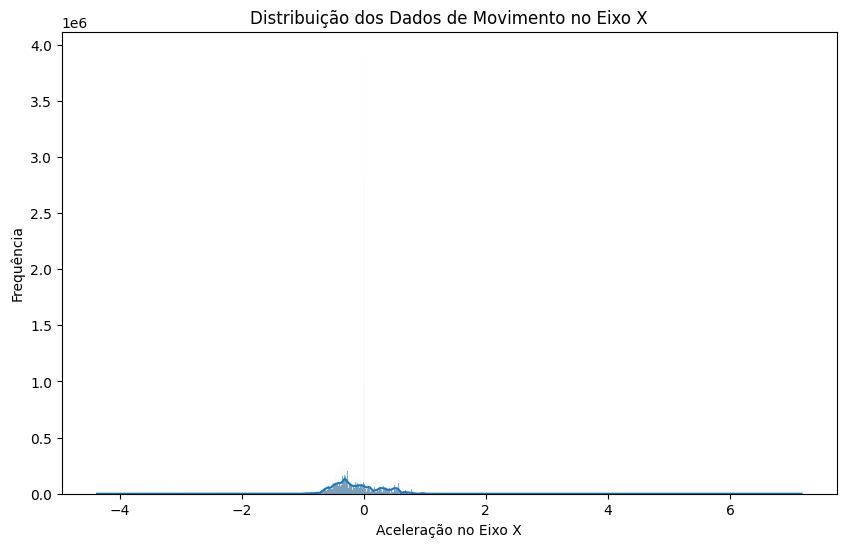

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(motion_df['x'], kde=True)
plt.title('Distribuição dos Dados de Movimento no Eixo X')
plt.xlabel('Aceleração no Eixo X')
plt.ylabel('Frequência')
plt.show()

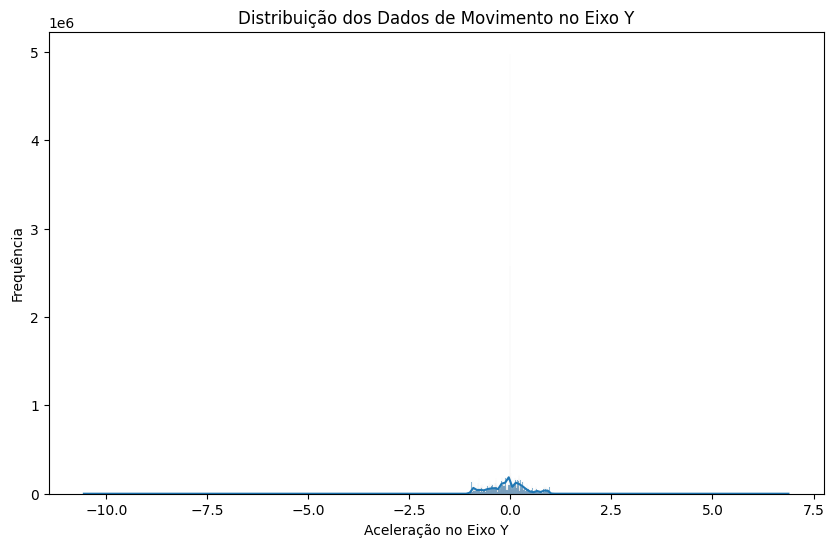

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(motion_df['y'], kde=True)
plt.title('Distribuição dos Dados de Movimento no Eixo Y')
plt.xlabel('Aceleração no Eixo Y')
plt.ylabel('Frequência')
plt.show()

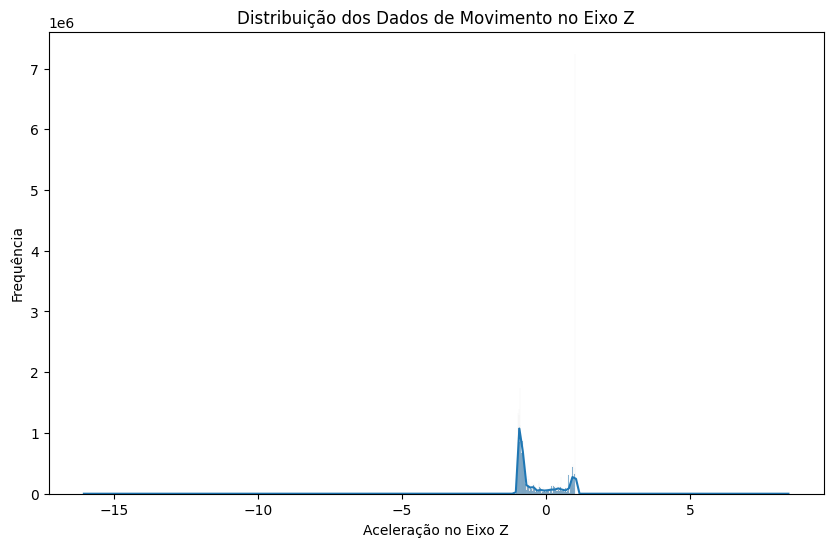

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(motion_df['z'], kde=True)
plt.title('Distribuição dos Dados de Movimento no Eixo Z')
plt.xlabel('Aceleração no Eixo Z')
plt.ylabel('Frequência')
plt.show()

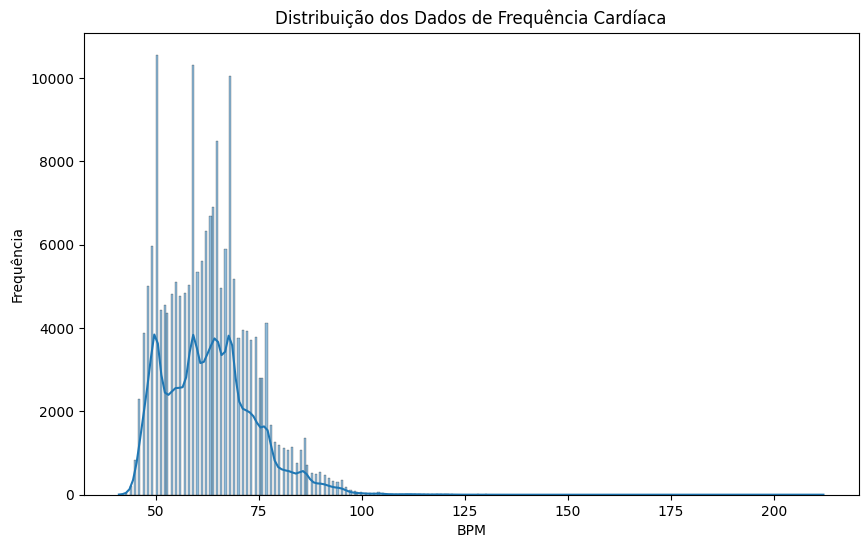

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(heartrate_df['bpm'], kde=True)
plt.title('Distribuição dos Dados de Frequência Cardíaca')
plt.xlabel('BPM')
plt.ylabel('Frequência')
plt.show()

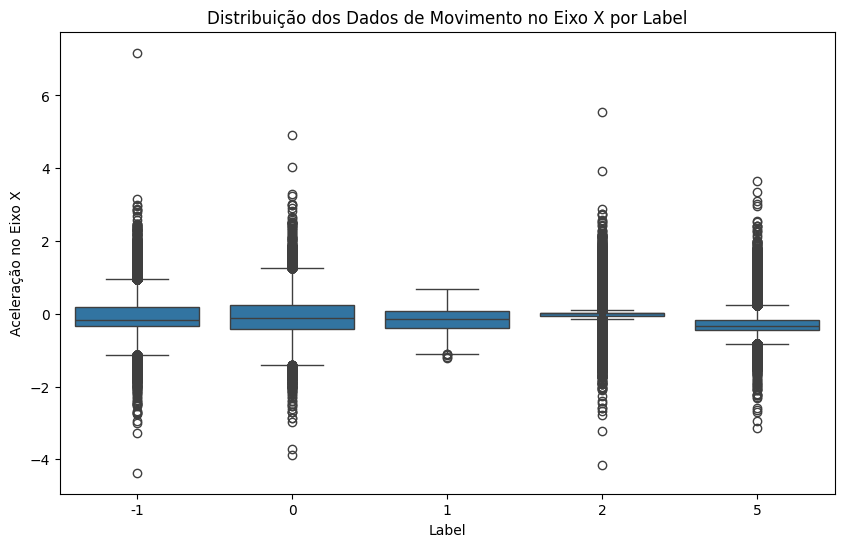

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='x', data=motion_df)
plt.title('Distribuição dos Dados de Movimento no Eixo X por Label')
plt.xlabel('Label')
plt.ylabel('Aceleração no Eixo X')
plt.show()

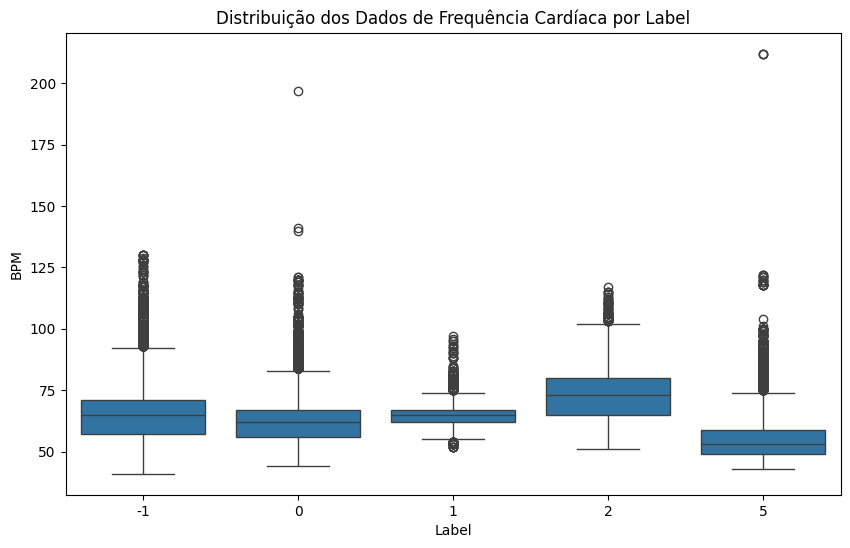

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='bpm', data=heartrate_df)
plt.title('Distribuição dos Dados de Frequência Cardíaca por Label')
plt.xlabel('Label')
plt.ylabel('BPM')
plt.show()

# Valores ausentes

In [15]:
motion_df.isnull().sum()

id       0
time     0
x        0
y        0
z        0
label    0
dtype: int64

In [16]:
heartrate_df.isnull().sum()

id       0
time     0
bpm      0
label    0
dtype: int64

# Correlação

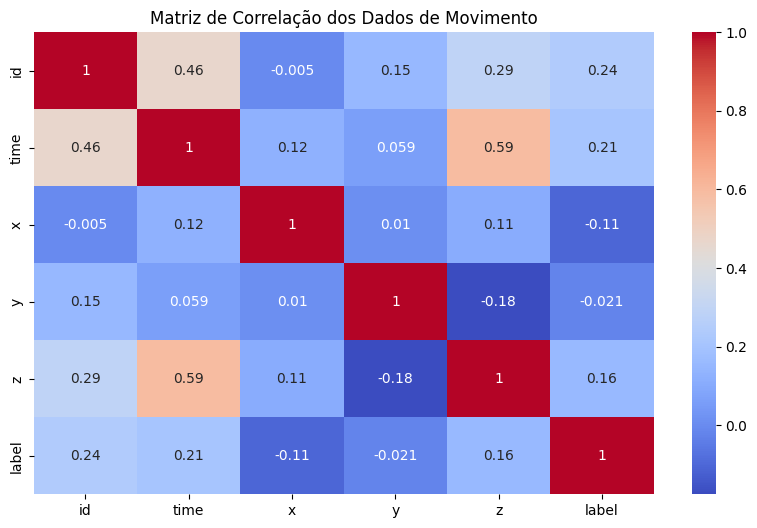

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(motion_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação dos Dados de Movimento')
plt.show()

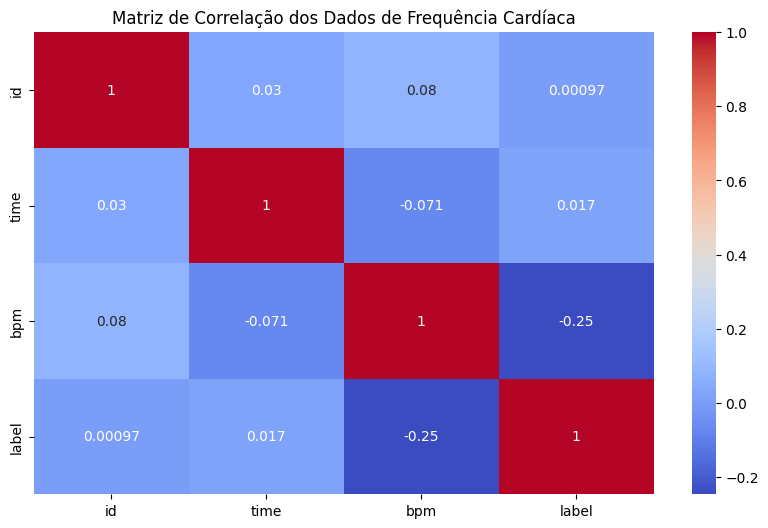

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(heartrate_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação dos Dados de Frequência Cardíaca')
plt.show()

# Visualização de série temporal

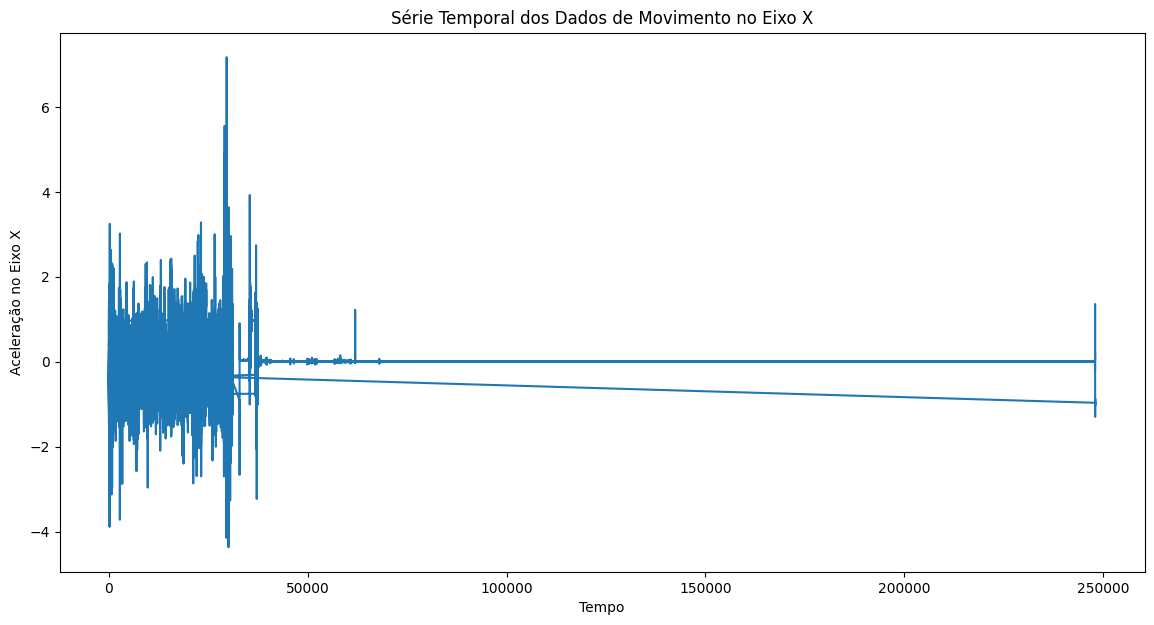

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(motion_df['time'], motion_df['x'])
plt.title('Série Temporal dos Dados de Movimento no Eixo X')
plt.xlabel('Tempo')
plt.ylabel('Aceleração no Eixo X')
plt.show()

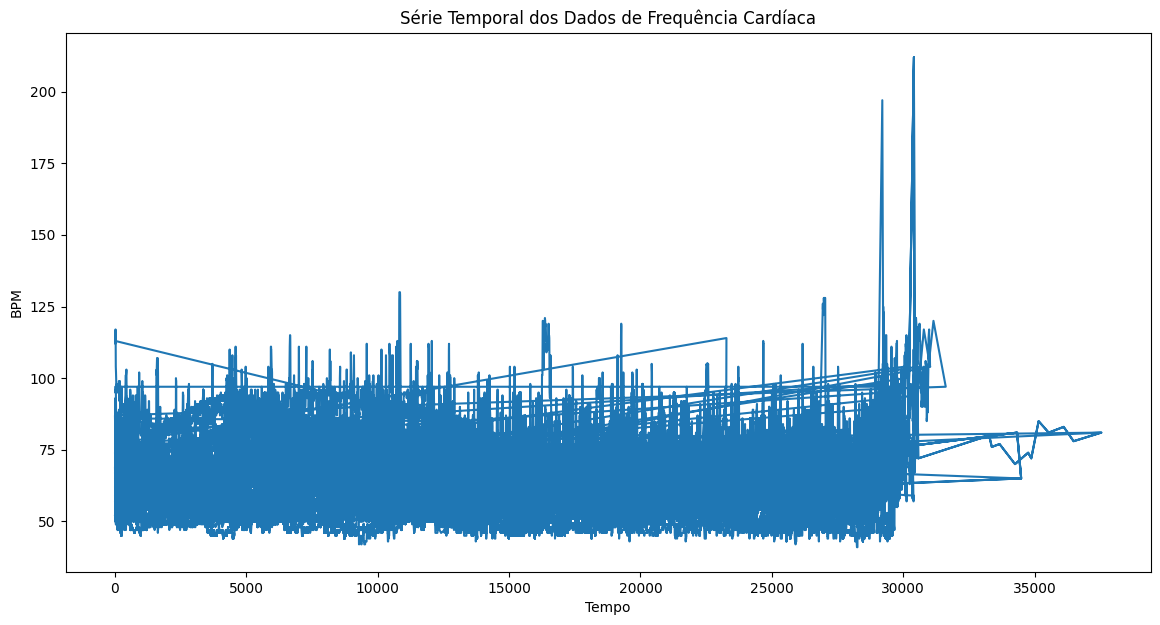

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(heartrate_df['time'], heartrate_df['bpm'])
plt.title('Série Temporal dos Dados de Frequência Cardíaca')
plt.xlabel('Tempo')
plt.ylabel('BPM')
plt.show()

# Autocorrelação

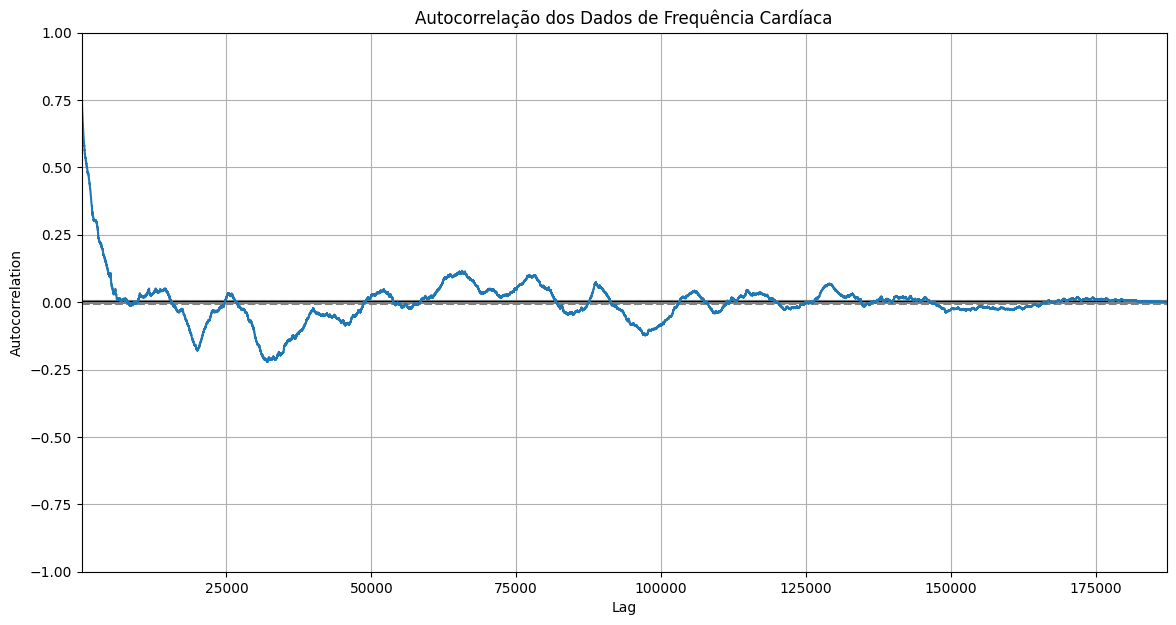

In [24]:
plt.figure(figsize=(14, 7))
autocorrelation_plot(heartrate_df['bpm'])
plt.title('Autocorrelação dos Dados de Frequência Cardíaca')
plt.show()

### Autocorrelação Inicial alta
Nos primeiros lags, a autocorrelação é alta, próxima de 0,75. Isso indica que os valores consecutivos da série de frequência cardíaca estão fortemente correlacionados. Essa alta autocorrelação é comum em séries temporais, onde os valores próximos no tempo tendem a ser semelhantes. Isso sugere que a frequência cardíaca é uma série temporal com dependência temporal significativa.
### Decaimento Rápido
Observa-se um decaimento rápido da autocorrelação nos primeiros lags, chegando a valores próximos de 0,25 em torno do lag 25.000. Esse decaimento sugere que, após um certo período, a dependência temporal entre os valores da série diminui.
### Padrões Ondulatórios
A autocorrelação exibe um padrão ondulatório, alternando entre valores positivos e negativos em diferentes lags. Esses padrões podem indicar a presença de ciclos ou sazonalidade nos dados. Fisiologicamente, isso poderia refletir ritmos circadianos ou outros ritmos biológicos que afetam a frequência cardíaca.
### Oscilações até Lag Elevados
A presença de oscilações na autocorrelação até lags elevados (aproximadamente 175.000) pode indicar ciclos de longo prazo ou padrões repetitivos nos dados. No entanto, a força dessas correlações diminui ao longo do tempo.
### Tender a zero 
À medida que os lags aumentam, a autocorrelação tende a se estabilizar em torno de zero. Isso indica que, para lags muito grandes, a correlação entre os valores torna-se insignificante.